In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "units=Imperial"
api = "&APPID=" + api_key

In [14]:
# Creates variable for response code then prints response code to the console
response = requests.get(url + unit + api).json()
print(response)

{'cod': '400', 'message': 'Nothing to geocode'}


In [15]:
# Creates dictionary for data to be stored from the api calls
city_data = {"City": [],
              "Lat": [],
              "Lng": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}

MINUTE = 60

In [19]:
# Decorator that limits "call_api" function to 60 api calls per minute
def call_api():
    
    # A loop that repeats an api call with dynamic endpoints then adds data retrieved from each api call into "city_data" dictionary
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()

        try:
            print("Processing city " + str(i) + ": " + city["name"])

            city_data["City"].append(city["name"])
            city_data["Lat"].append(city["coord"]["lat"])
            city_data["Lng"].append(city["coord"]["lon"])
            city_data["Max Temp"].append(city["main"]["temp_max"])
            city_data["Humidity"].append(city["main"]["humidity"])
            city_data["Cloudiness"].append(city["clouds"]["all"])
            city_data["Wind Speed"].append(city["wind"]["speed"])
            city_data["Country"].append(city["sys"]["country"])
            city_data["Date"].append(city["dt"])

        except:
            print("Incomplete record. Skipping city instance...")
            pass
    print("Data retrieval is complete.")
    
call_api()

Processing city 0: Ancud
Processing city 1: Hithadhoo
Processing city 2: Busselton
Processing city 3: Tuktoyaktuk
Incomplete record. Skipping city instance...
Processing city 5: Nikolskoye
Processing city 6: Rikitea
Processing city 7: Mataura
Incomplete record. Skipping city instance...
Processing city 9: Kalengwa
Processing city 10: Ushuaia
Processing city 11: Puerto Ayora
Processing city 12: Mahébourg
Incomplete record. Skipping city instance...
Processing city 14: Hasaki
Processing city 15: Barrow
Processing city 16: Fairbanks
Processing city 17: Punta Arenas
Processing city 18: Øksfjord
Processing city 19: Boralday
Processing city 20: Cape Town
Processing city 21: Jevnaker
Processing city 22: Dobrinka
Processing city 23: Guane
Processing city 24: Codrington
Processing city 25: Bredasdorp
Processing city 26: Atambua
Processing city 27: Mehamn
Processing city 28: Hilo
Processing city 29: Avarua
Processing city 30: Saint Paul Harbor
Processing city 31: Bambous Virieux
Processing city 

Processing city 260: Khovd
Processing city 261: Makkah al Mukarramah
Incomplete record. Skipping city instance...
Processing city 263: Constitución
Processing city 264: Kirakira
Incomplete record. Skipping city instance...
Processing city 266: San Cristobal
Processing city 267: Joshīmath
Processing city 268: Nola
Processing city 269: Katsuura
Processing city 270: Hobbs
Processing city 271: Esperance
Processing city 272: Provideniya
Processing city 273: Sivas Province
Processing city 274: Souillac
Processing city 275: Chernyshevskiy
Processing city 276: Maués
Processing city 277: Tautira
Processing city 278: Borova
Processing city 279: Carinhanha
Incomplete record. Skipping city instance...
Processing city 281: Lakatoro
Processing city 282: Chapais
Processing city 283: Gejiu
Processing city 284: Yagodnoye
Processing city 285: Faanui
Processing city 286: Fukuechō
Processing city 287: Barcelos
Processing city 288: Pevek
Processing city 289: Kavieng
Processing city 290: Red Wing
Processing

Processing city 521: Peleduy
Processing city 522: Moindou
Processing city 523: Los Llanos de Aridane
Incomplete record. Skipping city instance...
Processing city 525: Nha Trang
Processing city 526: Harper
Processing city 527: Petropavlovsk-Kamchatskiy
Processing city 528: Oranjestad
Processing city 529: Ixtapa
Processing city 530: Maxixe
Processing city 531: Troitskoye
Processing city 532: Kazachinskoye
Processing city 533: Farmington
Processing city 534: Kokopo
Processing city 535: Usinsk
Processing city 536: Oktyabr'skoye
Processing city 537: Port Hope
Processing city 538: Yemel'yanovo
Processing city 539: Karasjok
Processing city 540: Aras
Processing city 541: Nemuro
Processing city 542: Mutatá
Processing city 543: Leh
Processing city 544: Jiayuguan City
Processing city 545: Viedma
Processing city 546: Shakawe
Processing city 547: Jūnāgarh
Processing city 548: Currais Novos
Processing city 549: Shar
Processing city 550: Manadhoo
Processing city 551: Puri
Processing city 552: Vanavar

In [41]:
# Creates table/DataFrame from the "city_data" dictionary
city_data_df = pd.DataFrame(city_data)

# Exports DataFrame as a csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.87,-73.82,59.00,66,75,11.41,CL,1603908709
1,Hithadhoo,-0.60,73.08,83.64,72,20,11.14,MV,1603908672
2,Busselton,-33.65,115.33,55.99,49,0,12.28,AU,1603908710
3,Tuktoyaktuk,69.45,-133.04,19.40,92,90,19.46,CA,1603908680
4,Nikolskoye,59.70,30.79,46.99,87,20,6.71,RU,1603908710


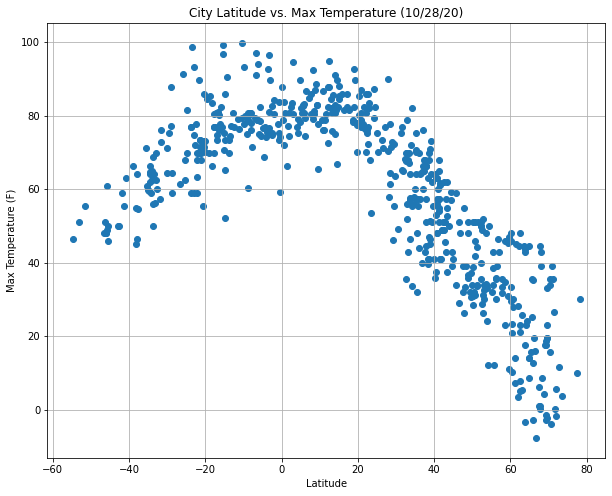

The code is to generate a scattered plot to show relationship between the dataset.


In [81]:
# Latitude vs. Temperature Plot

lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.figure(figsize=(10,8))
plt.scatter(lat, max_temp, linewidths=1, marker="o")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Images/fig1.png")
plt.show()
print("The code is to generate a scattered plot to show relationship between the dataset.")

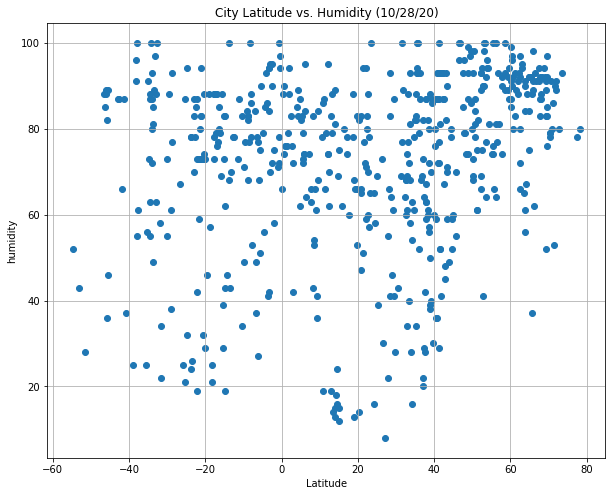

above scattered plot does not show relationship between the datasets.


In [82]:
plt.figure(figsize=(10,8))
plt.scatter(lat, humidity, linewidths=1, marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.grid(True)
plt.savefig("Images/fig2.png")
plt.show()
print("Above scattered plot does not show relationship between the datasets.")

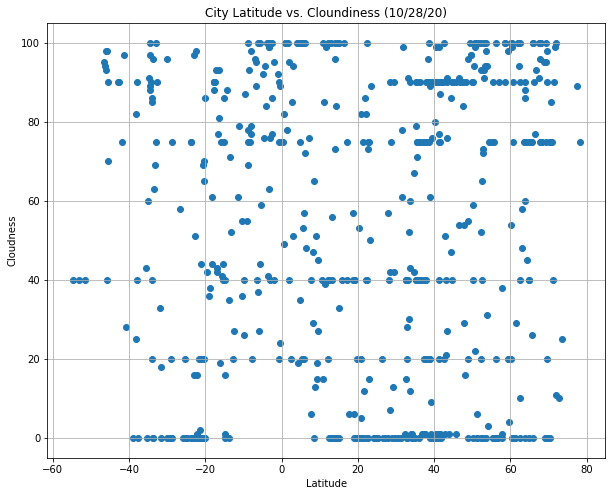

Above scattered plots shows no relation between the latitude vs cloudiness.


In [84]:
plt.figure(figsize=(10,8))
plt.scatter(lat, cloudiness, linewidths=1, marker="o")
plt.title("City Latitude vs. Cloundiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudness")
plt.grid(True)
plt.savefig("Images/fig3.png")
plt.show()
print("Above scattered plots shows no relation between the latitude vs cloudiness.")

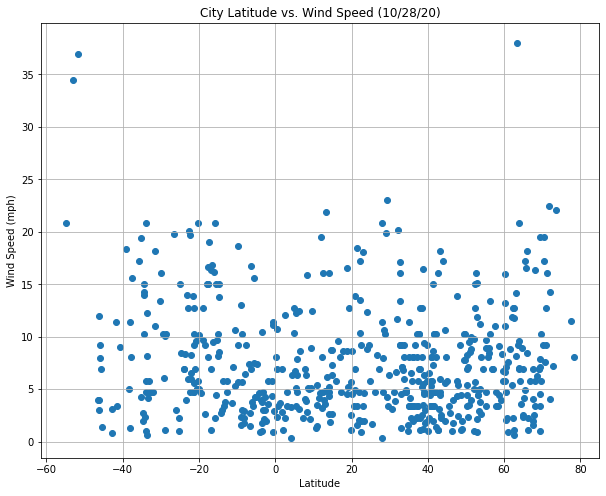

The plot shows low wind speed across as we move closer or farther away from the equator.
No direct correlation can be seen.


In [89]:
plt.figure(figsize=(10,8))
plt.scatter(lat, wind_speed, linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Images/fig4.png")
plt.show()
print("The plot shows low wind speed across as we move closer or farther away from the equator.")
print("No direct correlation can be seen.")

In [90]:
#creating two dataframes to run linear regressions

northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
#northern_df.head()
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]
#southern_df.head()

Regression line equation is: y = -1.09x + 95.54


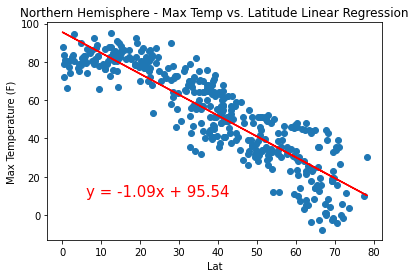

The r-squared is: -0.8862368384900372
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


In [58]:
# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Images/fig5.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")

Regression line equation is: y = 0.64x + 85.0


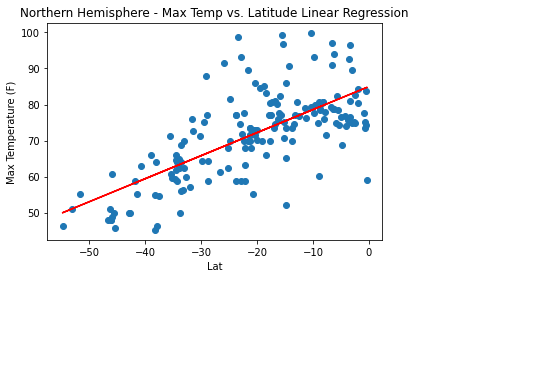

The r-squared is: 0.6979349572699424
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


In [61]:
# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hamisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Images/fig6.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")

Regression line equation is: y = 0.35x + 59.55


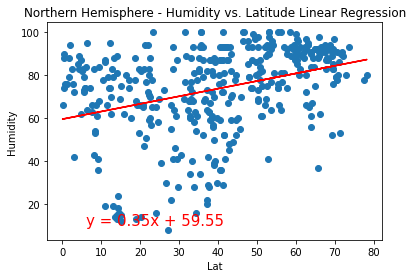

The r-squared is: 0.33947505475203676
In the nothern hemisphere, data does not show much of a correlation between betwen latitude and humidity.


In [71]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("Images/fig7.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In the nothern hemisphere, data does not show much of a correlation between latitude and humidity.")

Regression line equation is: y = 0.16x + 73.41


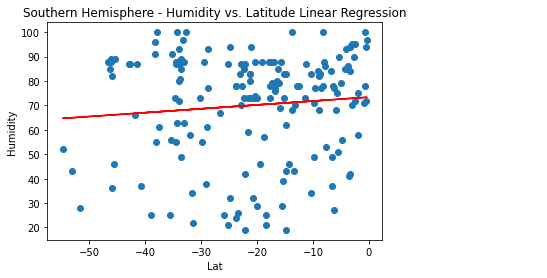

The r-squared is: 0.09682296346179252
In Southern hemisphere, data does not show any correlation between Latitude and Humidity


In [72]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("Images/fig8.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In Southern hemisphere, data does not show any correlation between Latitude and Humidity")


Regression line equation is: y = 0.22x + 43.01


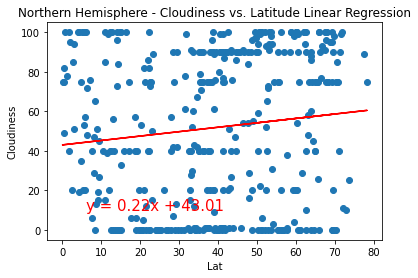

In [73]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("Images/fig9.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In the nothern hemisphere, data does not show much of a correlation between latitude and Cloudiness.")

Regression line equation is: y = 0.29x + 60.45


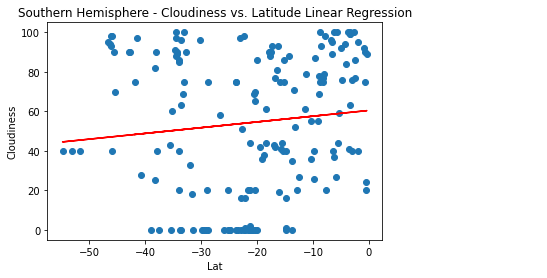

The r-squared is: 0.10846136494841598
In Southern hemisphere, data does not show much of a correlation between Latitude and Cloudiness


In [76]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("Images/fig10.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In Southern hemisphere, data does not show much of a correlation between Latitude and Cloudiness")

Regression line equation is: y = 0.03x + 5.92


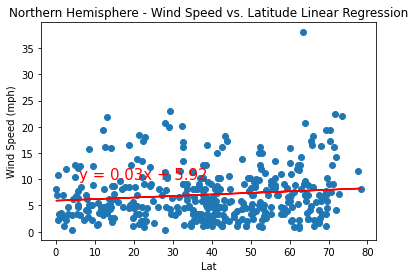

The r-squared is: 0.11899036248348963


In [77]:
# create linear regression chart for Northern Hemisphere Wind Speed  vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("Images/fig11.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In the nothern hemisphere, data does not show much of a correlation between latitude and Wind Speed.")

Regression line equation is: y = -0.13x + 5.64


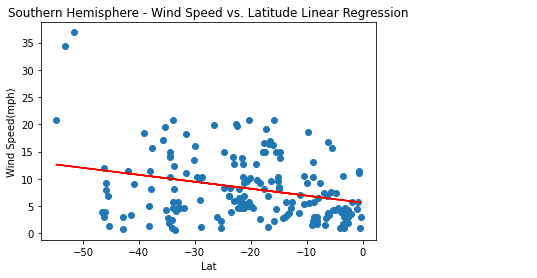

The r-squared is: -0.2753783233224911
In Southern hemisphere, data does not show much of a correlation between Latitude and Wind Speed


In [78]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("Images/fig112.png")
plt.show()
print(f"The r-squared is: {rvalue}")
print("In Southern hemisphere, data does not show much of a correlation between Latitude and Wind Speed")